<a href="https://colab.research.google.com/github/antonsysoev/appl_stat/blob/gh-pages/PCA_%2B_FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Анализ главных компонентов

In [1]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [2]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")

Loading required package: devtools

Loading required package: usethis




vctrs   (0.5.0 -> 0.5.1) [CRAN]
pkgload (1.3.1 -> 1.3.2) [CRAN]
xfun    (0.34  -> 0.35 ) [CRAN]
knitr   (1.40  -> 1.41 ) [CRAN]


Installing 4 packages: vctrs, pkgload, xfun, knitr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmpa1vywv/remotes4b59c85e66/kassambara-factoextra-1689fc7/DESCRIPTION’ ... OK
* preparing ‘factoextra’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘factoextra_1.0.7.999.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Данные

In [4]:
data(decathlon2)
decathlon2.active <- decathlon2[1:23, 1:10]
head(decathlon2.active[, 1:6])

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69
CLAY,10.76,7.40,14.26,1.86,49.37,14.05
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38


Вычисление главных компонентов

In [5]:
res.pca <- prcomp(decathlon2.active, scale = TRUE)

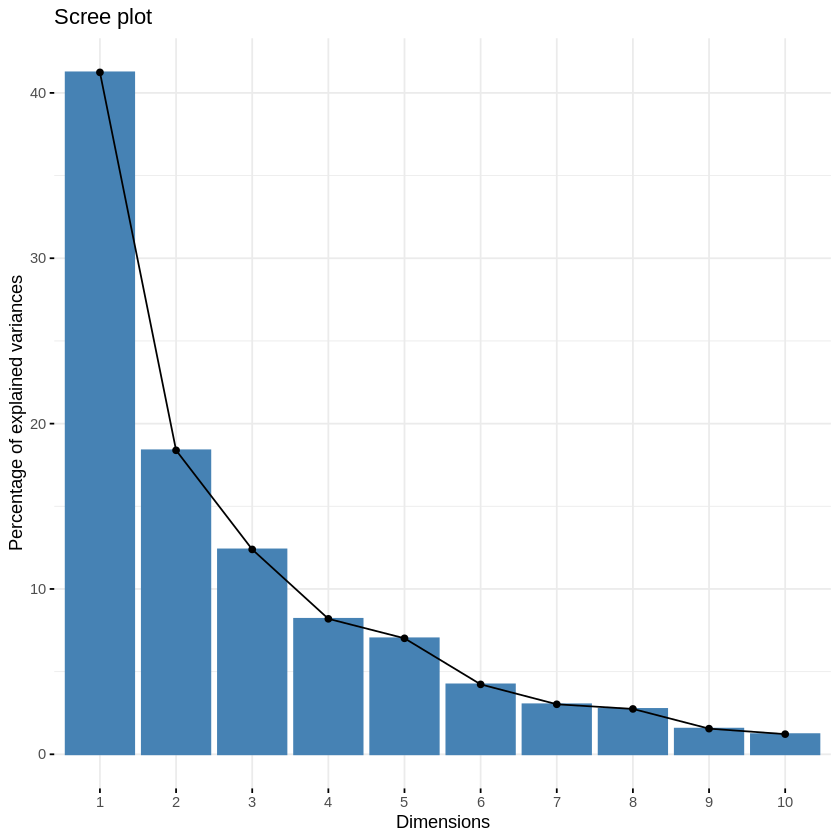

In [6]:
fviz_eig(res.pca)

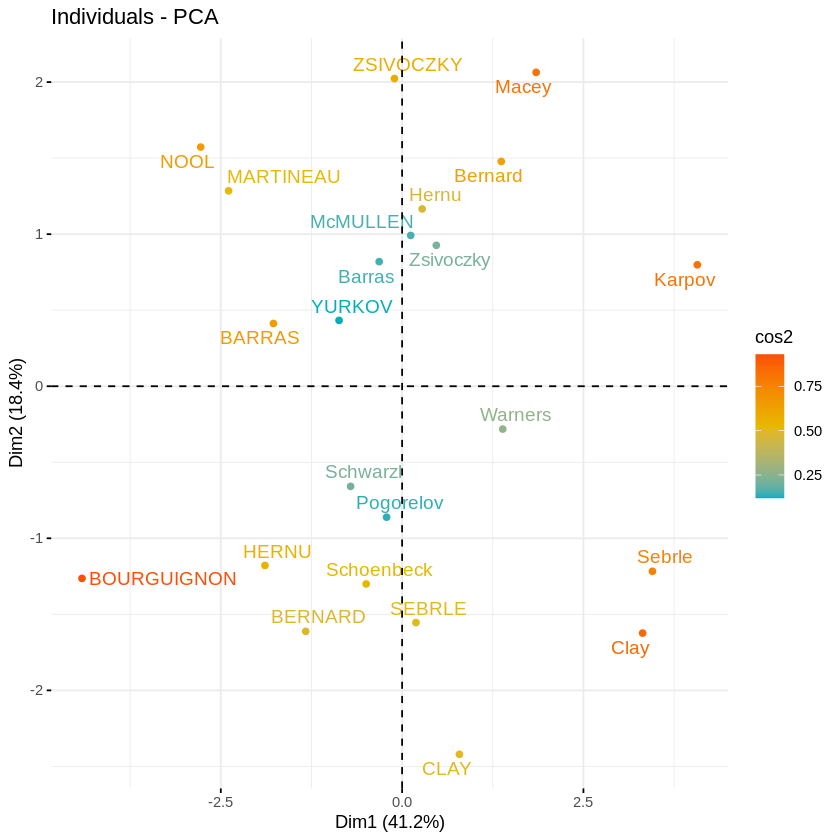

In [7]:
fviz_pca_ind(res.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

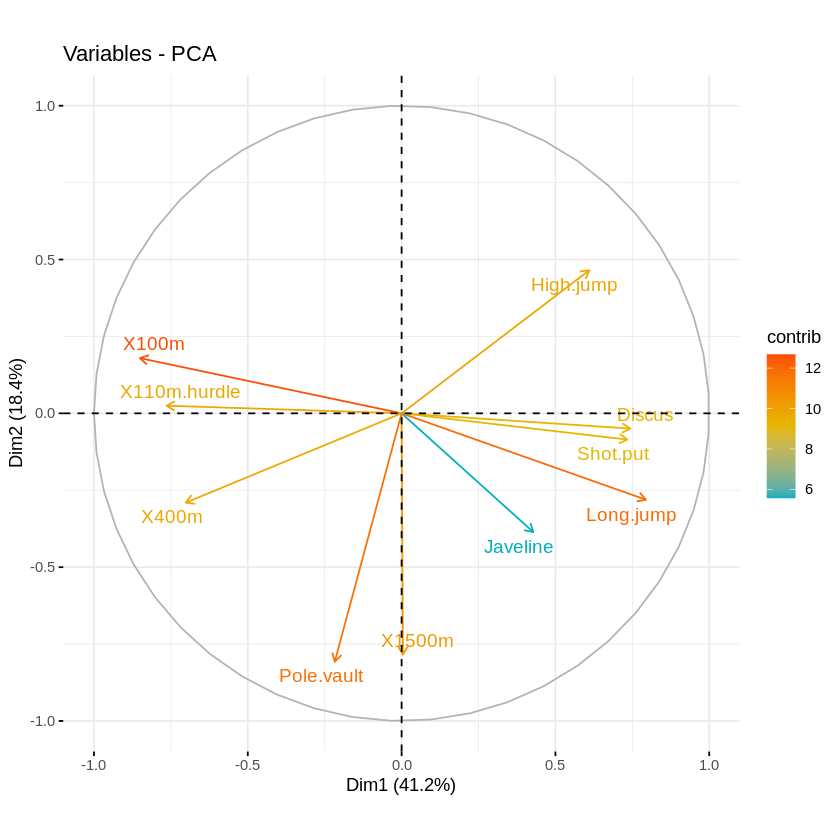

In [8]:
fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

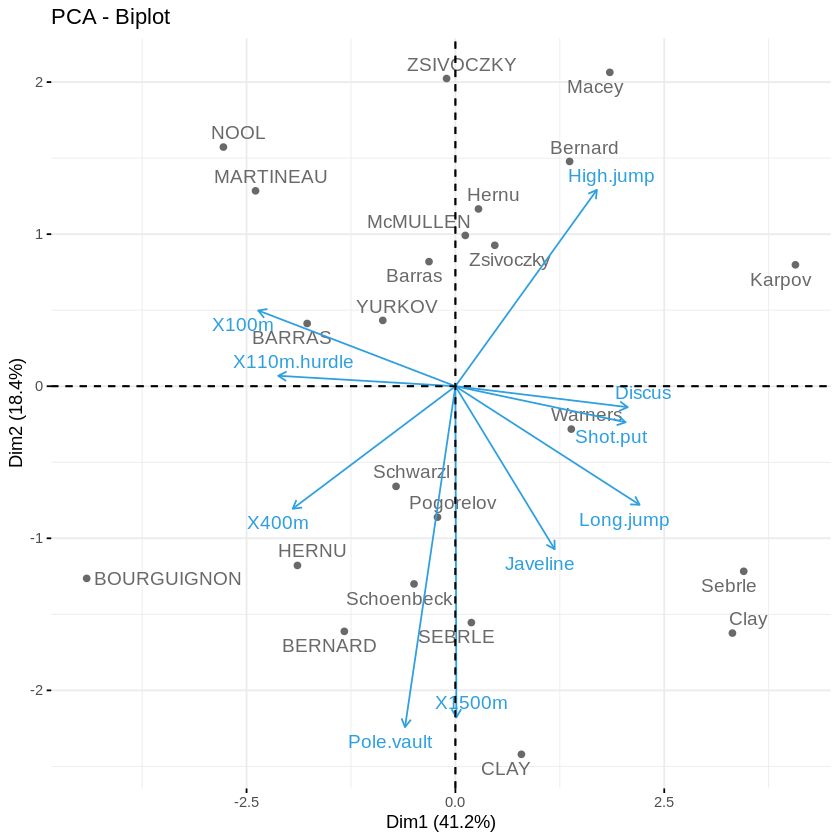

In [9]:
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

In [10]:
# Eigenvalues
eig.val <- get_eigenvalue(res.pca)
eig.val
  
# Results for Variables
res.var <- get_pca_var(res.pca)
res.var$coord          # Coordinates
res.var$contrib        # Contributions to the PCs
res.var$cos2           # Quality of representation 
# Results for individuals
res.ind <- get_pca_ind(res.pca)
res.ind$coord          # Coordinates
res.ind$contrib        # Contributions to the PCs
res.ind$cos2           # Quality of representation 

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,4.1242133,41.242133,41.24213
Dim.2,1.8385309,18.385309,59.62744
Dim.3,1.2391403,12.391403,72.01885
Dim.4,0.8194402,8.194402,80.21325
Dim.5,0.7015528,7.015528,87.22878
Dim.6,0.4228828,4.228828,91.45760
Dim.7,0.3025817,3.025817,94.48342
Dim.8,0.2744700,2.744700,97.22812
Dim.9,0.1552169,1.552169,98.78029


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,-0.850625692,0.17939806,-0.30155643,0.03357320,-0.1944440,0.035374780,-0.091336386,-0.104716925,-0.30306448,0.044417974
Long.jump,0.794180641,-0.28085695,0.19054653,-0.11538956,0.2331567,-0.033727883,-0.154330810,-0.397380703,-0.05158951,0.029719453
Shot.put,0.733912733,-0.08540412,-0.51759781,0.12846837,-0.2488129,-0.239789034,-0.009886612,0.024359049,0.04778655,0.217451948
High.jump,0.610083985,0.46521415,-0.33008517,0.14455012,0.4027002,-0.284644846,0.028157465,0.084405578,-0.11213822,-0.133566774
X400m,-0.701603377,-0.29017826,-0.28353292,0.43082552,0.1039085,-0.049289996,0.286106008,-0.233552216,0.08216041,-0.034170673
X110m.hurdle,-0.764125197,0.02474081,-0.44888733,-0.01689589,0.2242200,0.002632395,-0.370072158,-0.008344682,0.16176025,-0.015629914
Discus,0.743209016,-0.04966086,-0.17652518,0.39500915,-0.4082391,0.198544870,-0.142725641,-0.039559255,0.01336209,-0.172590426
Pole.vault,-0.217268042,-0.80745110,-0.09405773,-0.33898477,-0.2216853,-0.327464549,-0.010393176,0.032914942,-0.02576874,-0.137211339
Javeline,0.428226639,-0.38610928,-0.60412432,-0.33173454,0.1978128,0.362097598,0.133564318,0.052841099,-0.04045397,-0.003854347
X1500m,0.004278487,-0.78448019,0.21947068,0.44800961,0.2632527,0.042050151,-0.111367083,0.194469730,-0.10224014,0.062834809


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,1.754429e+01,1.7505098,7.3386590,0.13755240,5.389252,0.295915322,2.75705260,3.99520353,59.1740009,1.61756139
Long.jump,1.529317e+01,4.2904162,2.9300944,1.62485936,7.748815,0.269003613,7.87159392,57.53322220,1.7146826,0.72414393
Shot.put,1.306014e+01,0.3967224,21.6204325,2.01407269,8.824401,13.596858744,0.03230371,0.21618512,1.4712015,38.76768578
High.jump,9.024811e+00,11.7715838,8.7928883,2.54987951,23.115504,19.159607001,0.26202607,2.59565787,8.1015517,14.62649091
X400m,1.193554e+01,4.5799296,6.4876363,22.65090599,1.539012,0.574509906,27.05274658,19.87344405,4.3489667,0.95730504
X110m.hurdle,1.415754e+01,0.0332933,16.2612611,0.03483735,7.166193,0.001638634,45.26163460,0.02537025,16.8579392,0.20028870
Discus,1.339309e+01,0.1341398,2.5147385,19.04132022,23.755756,9.321746508,6.73226823,0.57016606,0.1150295,24.42174410
Pole.vault,1.144592e+00,35.4618611,0.7139512,14.02307063,7.005084,25.357622290,0.03569883,0.39472201,0.4278065,15.43559151
Javeline,4.446377e+00,8.1086683,29.4531777,13.42963254,5.577615,31.004964393,5.89573984,1.01729950,1.0543458,0.01217993
X1500m,4.438531e-04,33.4728757,3.8871610,24.49386930,9.878367,0.418133591,4.09893563,13.77872941,6.7344755,3.23700871


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,7.235641e-01,0.0321836641,0.090936280,0.0011271597,0.03780845,1.251375e-03,0.0083423353,1.096563e-02,0.0918480768,1.972956e-03
Long.jump,6.307229e-01,0.0788806285,0.036307981,0.0133147506,0.05436203,1.137570e-03,0.0238179990,1.579114e-01,0.0026614779,8.832459e-04
Shot.put,5.386279e-01,0.0072938636,0.267907488,0.0165041211,0.06190783,5.749878e-02,0.0000977451,5.933633e-04,0.0022835540,4.728535e-02
High.jump,3.722025e-01,0.2164242070,0.108956221,0.0208947375,0.16216747,8.102269e-02,0.0007928428,7.124302e-03,0.0125749811,1.784008e-02
X400m,4.922473e-01,0.0842034209,0.080390914,0.1856106269,0.01079698,2.429504e-03,0.0818566479,5.454664e-02,0.0067503333,1.167635e-03
X110m.hurdle,5.838873e-01,0.0006121077,0.201499837,0.0002854712,0.05027463,6.929502e-06,0.1369534023,6.963371e-05,0.0261663784,2.442942e-04
Discus,5.523596e-01,0.0024662013,0.031161138,0.1560322304,0.16665918,3.942007e-02,0.0203706085,1.564935e-03,0.0001785453,2.978746e-02
Pole.vault,4.720540e-02,0.6519772763,0.008846856,0.1149106765,0.04914437,1.072330e-01,0.0001080181,1.083393e-03,0.0006640282,1.882695e-02
Javeline,1.833781e-01,0.1490803723,0.364966189,0.1100478063,0.03912992,1.311147e-01,0.0178394271,2.792182e-03,0.0016365234,1.485599e-05
X1500m,1.830545e-05,0.6154091638,0.048167378,0.2007126089,0.06930197,1.768215e-03,0.0124026272,3.781848e-02,0.0104530472,3.948213e-03


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
SEBRLE,0.1912074,-1.5541282,-0.62836882,0.08205241,1.1426139415,-0.46389755,-0.20796012,0.043460568,-0.659344137,0.03273238
CLAY,0.7901217,-2.4204156,1.35688701,1.26984296,-0.8068483724,1.30420016,-0.21291866,0.617240611,-0.060125359,-0.31716015
BERNARD,-1.3292592,-1.6118687,-0.19614996,-1.92092203,0.0823428202,-0.40062867,-0.40643754,0.703856040,0.170083313,-0.09908142
YURKOV,-0.8694134,0.4328779,-2.47398223,0.69723814,0.3988584116,0.10286344,-0.32487448,0.114996135,-0.109524039,-0.11969720
ZSIVOCZKY,-0.1057450,2.0233632,1.30493117,-0.09929630,-0.1970241089,0.89554111,0.08825624,-0.202341299,-0.523103099,-0.34842265
McMULLEN,0.1185550,0.9916237,0.84355824,1.31215266,1.5858708644,0.18657283,0.47828432,0.293089967,-0.105623196,-0.39317797
MARTINEAU,-2.3923532,1.2849234,-0.89816842,0.37309771,-2.2433515889,-0.45666350,-0.29975522,-0.291628488,-0.223417655,-0.61640509
HERNU,-1.8910497,-1.1784614,-0.15641037,0.89130068,-0.1267412520,0.43623496,-0.56609980,-1.529404317,0.006184409,0.55368016
BARRAS,-1.7744575,0.4125321,0.65817750,0.22872866,-0.2338366980,0.09026010,0.21594095,0.682583078,-0.669282042,0.53085420
NOOL,-2.7770058,1.5726757,0.60724821,-1.55548081,1.4241839810,0.49716399,-0.53205687,-0.433385655,-0.115777808,-0.09622142


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
SEBRLE,0.03854254,5.7118249,1.385418e+00,0.03572215,8.091161e+00,2.21256620,0.621426384,2.992045e-02,12.177477305,0.03819185
CLAY,0.65814114,13.8541889,6.460097e+00,8.55568792,4.034555e+00,17.48801877,0.651413899,6.035125e+00,0.101262442,3.58568943
BERNARD,1.86273218,6.1441319,1.349983e-01,19.57827284,4.202070e-02,1.65019840,2.373652810,7.847747e+00,0.810319793,0.34994507
YURKOV,0.79686310,0.4431309,2.147558e+01,2.57939100,9.859373e-01,0.10878629,1.516564073,2.094806e-01,0.336009790,0.51072064
ZSIVOCZKY,0.01178829,9.6816398,5.974848e+00,0.05231437,2.405750e-01,8.24561722,0.111923276,6.485544e-01,7.664919832,4.32741147
McMULLEN,0.01481737,2.3253860,2.496789e+00,9.13531719,1.558646e+01,0.35788945,3.287016354,1.360753e+00,0.312501167,5.51053518
MARTINEAU,6.03367104,3.9044125,2.830527e+00,0.73858431,3.118936e+01,2.14409841,1.291109482,1.347216e+00,1.398195851,13.54402896
HERNU,3.76996156,3.2842176,8.583863e-02,4.21505626,9.955149e-02,1.95655942,4.604850849,3.705288e+01,0.001071345,10.92781554
BARRAS,3.31942012,0.4024544,1.519980e+00,0.27758505,3.388731e-01,0.08376135,0.670038259,7.380544e+00,12.547331617,10.04537028
NOOL,8.12988880,5.8489726,1.293851e+00,12.83761115,1.257025e+01,2.54127369,4.067669683,2.975270e+00,0.375477289,0.33003418


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
SEBRLE,0.007530179,0.49747323,8.132523e-02,0.001386688,2.689027e-01,0.0443241299,8.907507e-03,3.890334e-04,8.954067e-02,0.0002206741
CLAY,0.048701249,0.45701660,1.436281e-01,0.125791741,5.078506e-02,0.1326907339,3.536548e-03,2.972084e-02,2.820119e-04,0.0078471026
BERNARD,0.197199804,0.28996555,4.294015e-03,0.411819183,7.567259e-04,0.0179131165,1.843634e-02,5.529104e-02,3.228572e-03,0.0010956493
YURKOV,0.096109800,0.02382571,7.782303e-01,0.061812637,2.022798e-02,0.0013453555,1.341980e-02,1.681440e-03,1.525225e-03,0.0018217256
ZSIVOCZKY,0.001574385,0.57641944,2.397542e-01,0.001388216,5.465497e-03,0.1129176906,1.096685e-03,5.764478e-03,3.852703e-02,0.0170924251
McMULLEN,0.002175437,0.15219499,1.101379e-01,0.266486530,3.892621e-01,0.0053876990,3.540616e-02,1.329562e-02,1.726733e-03,0.0239268142
MARTINEAU,0.404013915,0.11654676,5.694575e-02,0.009826320,3.552552e-01,0.0147210347,6.342774e-03,6.003515e-03,3.523552e-03,0.0268211980
HERNU,0.399282749,0.15506199,2.731529e-03,0.088699901,1.793538e-03,0.0212478795,3.578167e-02,2.611676e-01,4.270425e-06,0.0342288717
BARRAS,0.616241975,0.03330700,8.478249e-02,0.010239088,1.070152e-02,0.0015944528,9.126203e-03,9.118662e-02,8.766746e-02,0.0551531863
NOOL,0.489872515,0.15711146,2.342405e-02,0.153694675,1.288433e-01,0.0157010551,1.798232e-02,1.193105e-02,8.514912e-04,0.0005881295


покажем, как предсказать координаты дополнительных индивидуумов и переменных, используя только информацию, предоставленную ранее выполненным PCA.

Данные: строки с 24 по 27 и столбцы с 1 по 10 [в наборах данных decathlon2]. Новые данные должны содержать столбцы (переменные) с теми же именами и в том же порядке, что и активные данные, использованные для расчета PCA.

In [11]:
# Data for the supplementary individuals
ind.sup <- decathlon2[24:27, 1:10]
ind.sup[, 1:6]

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23
Nool,10.80,7.53,14.26,1.88,48.81,14.80
Drews,10.87,7.38,13.07,1.88,48.51,14.01


In [12]:
ind.sup.coord <- predict(res.pca, newdata = ind.sup)
ind.sup.coord[, 1:4]

,PC1,PC2,PC3,PC4
KARPOV,0.7772521,-0.76237804,1.5971253,1.6863286
WARNERS,-0.3779697,0.11891968,1.7005146,-0.6908084
Nool,-0.5468405,-1.93402211,0.4724184,-2.2283706
Drews,-1.0848227,-0.01703198,2.9818031,-1.5006207


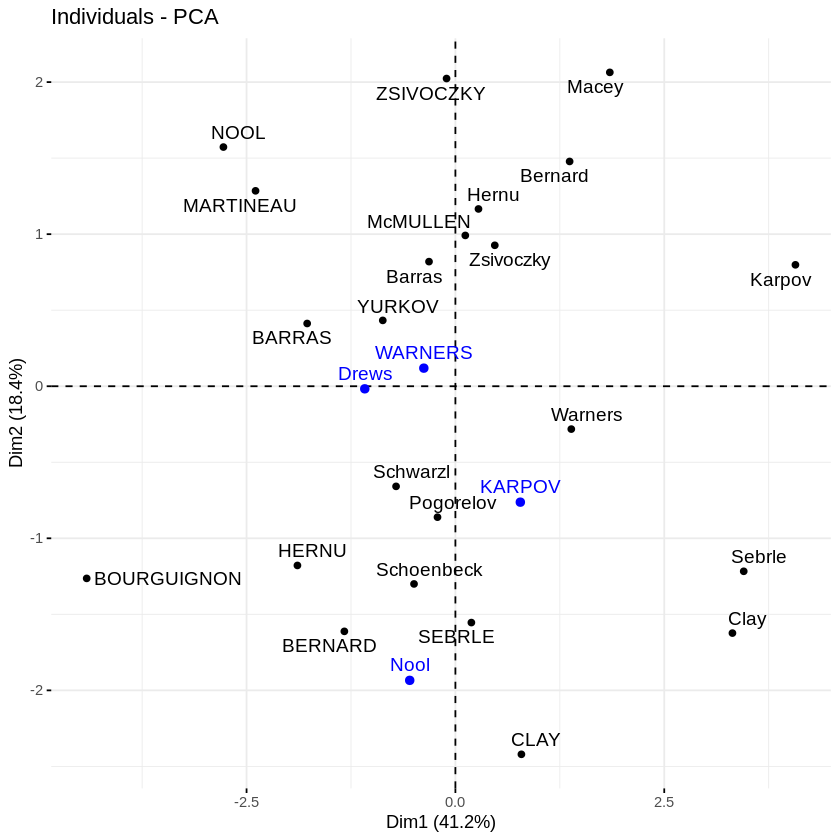

In [13]:
# Plot of active individuals
p <- fviz_pca_ind(res.pca, repel = TRUE)
# Add supplementary individuals
fviz_add(p, ind.sup.coord, color ="blue")

Предсказанные координаты особей могут быть рассчитаны вручную следующим образом:

* Центрировать и масштабировать данные новых реализаций, используя  центр и масштаб PCA.
* Вычислить прогнозируемые координаты путем умножения масштабированных значений на собственные векторы (нагрузки) главных компонент.


In [14]:
# Centering and scaling the supplementary individuals
ind.scaled <- scale(ind.sup, 
                    center = res.pca$center,
                    scale = res.pca$scale)
# Coordinates of the individividuals
coord_func <- function(ind, loadings){
  r <- loadings*ind
  apply(r, 2, sum)
}
pca.loadings <- res.pca$rotation
ind.sup.coord <- t(apply(ind.scaled, 1, coord_func, pca.loadings ))
ind.sup.coord[, 1:4]

,PC1,PC2,PC3,PC4
KARPOV,0.7772521,-0.76237804,1.5971253,1.6863286
WARNERS,-0.3779697,0.11891968,1.7005146,-0.6908084
Nool,-0.5468405,-1.93402211,0.4724184,-2.2283706
Drews,-1.0848227,-0.01703198,2.9818031,-1.5006207


Факторный анализ

In [16]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




In [17]:
library(psych)
library(corrplot)
library(ggplot2)
library(car)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


corrplot 0.92 loaded

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit




In [18]:
url <- "https://raw.githubusercontent.com/housecricket/data/main/efa/sample1.csv"
data_survey <- read.csv(url, sep = ",")

In [19]:
describe(data_survey)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ID,1,259,130.000000,74.911058,130,130.000000,96.3690,1,259,258,0.0000000,-1.2139083,4.65474668
KM1,2,259,3.312741,1.290496,3,3.387560,1.4826,1,5,4,-0.2695616,-0.8894511,0.08018751
KM2,3,259,3.362934,1.369496,3,3.449761,1.4826,1,5,4,-0.3536081,-1.0192345,0.08509636
KM3,4,259,3.397683,1.308942,3,3.492823,1.4826,1,5,4,-0.3764581,-0.9048830,0.08133367
QC1,5,259,3.776062,1.348286,4,3.961722,1.4826,1,5,4,-0.9325626,-0.5021406,0.08377840
QC2,6,259,3.409266,1.172385,3,3.483254,1.4826,1,5,4,-0.2998713,-0.6226972,0.07284848
QC3,7,259,3.339768,1.232789,3,3.421053,1.4826,1,5,4,-0.2675501,-0.8144779,0.07660179
CT1,8,259,3.687259,1.120057,4,3.803828,1.4826,1,5,4,-0.5369267,-0.2422238,0.06959694
CT2,9,259,3.733591,1.075841,4,3.842105,1.4826,1,5,4,-0.5563827,-0.2063447,0.06684949


In [20]:
dat <- data_survey[ , -1] 
head(dat)

,KM1,KM2,KM3,QC1,QC2,QC3,CT1,CT2,CT3,PC1,PC2,PC3,QD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5,5,5,5,2,1,1,3,1,4,1,3,4
2,3,3,3,4,5,3,4,5,4,2,2,2,4
3,2,2,2,2,2,1,3,3,3,4,3,5,2
4,4,3,3,4,3,4,4,4,4,1,1,3,3
5,4,4,4,2,3,4,4,4,4,3,3,5,4
6,1,1,1,2,5,3,5,5,5,4,3,5,3


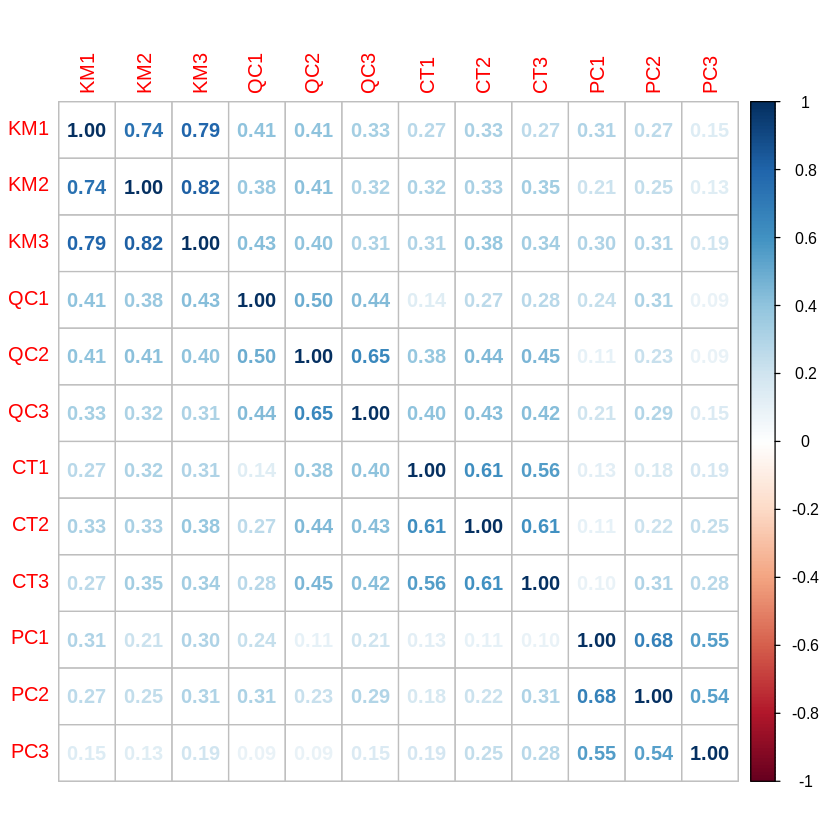

In [21]:
datamatrix <- cor(dat[,c(-13)])
corrplot(datamatrix, method="number")

In [22]:
X <- dat[,-c(13)]
Y <- dat[,13]

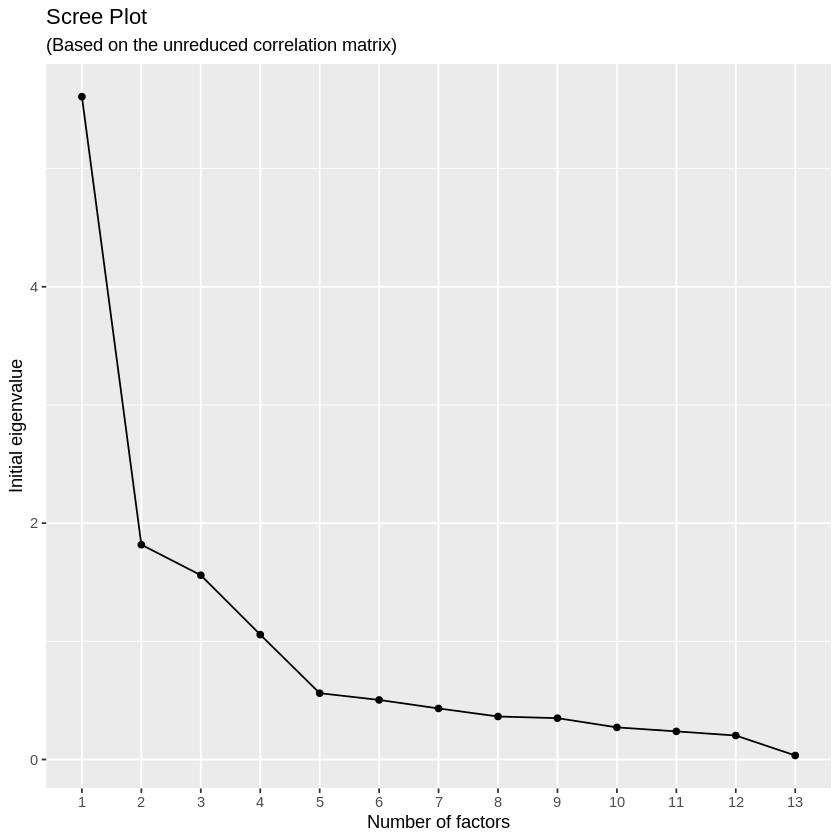

In [23]:
fafitfree <- fa(dat,nfactors = ncol(X), rotate = "none")
n_factors <- length(fafitfree$e.values)
scree     <- data.frame(
  Factor_n =  as.factor(1:n_factors), 
  Eigenvalue = fafitfree$e.values)
ggplot(scree, aes(x = Factor_n, y = Eigenvalue, group = 1)) + 
  geom_point() + geom_line() +
  xlab("Number of factors") +
  ylab("Initial eigenvalue") +
  labs( title = "Scree Plot", 
        subtitle = "(Based on the unreduced correlation matrix)")

Parallel analysis suggests that the number of factors =  4  and the number of components =  3 


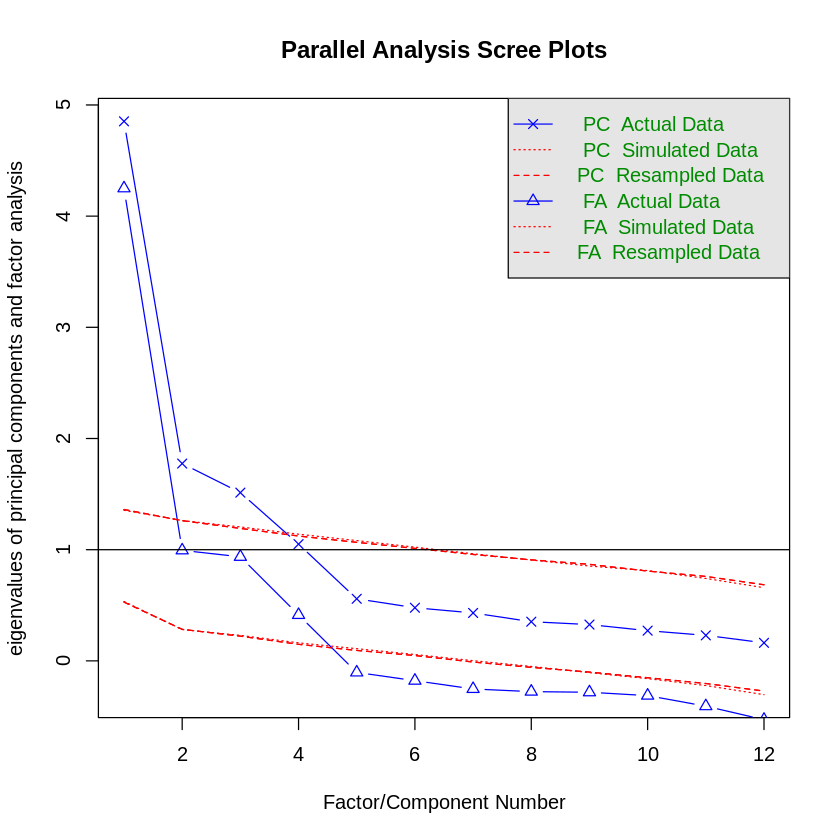

In [24]:
parallel <- fa.parallel(X)

In [25]:
fa.none <- fa(r=X, 
 nfactors = 4, 
 # covar = FALSE, SMC = TRUE,
 fm="pa", # type of factor analysis we want to use (“pa” is principal axis factoring)
 max.iter=100, # (50 is the default, but we have changed it to 100
 rotate="varimax") # none rotation
print(fa.none)

Factor Analysis using method =  pa
Call: fa(r = X, nfactors = 4, rotate = "varimax", max.iter = 100, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
     PA1   PA3  PA2   PA4   h2   u2 com
KM1 0.80  0.13 0.15  0.24 0.73 0.27 1.3
KM2 0.82  0.22 0.08  0.20 0.76 0.24 1.3
KM3 0.88  0.21 0.17  0.18 0.88 0.12 1.3
QC1 0.31  0.06 0.16  0.56 0.43 0.57 1.8
QC2 0.23  0.34 0.01  0.74 0.71 0.29 1.6
QC3 0.13  0.35 0.13  0.66 0.59 0.41 1.7
CT1 0.15  0.72 0.08  0.14 0.56 0.44 1.2
CT2 0.19  0.75 0.10  0.21 0.65 0.35 1.3
CT3 0.15  0.69 0.15  0.25 0.59 0.41 1.5
PC1 0.18 -0.03 0.82  0.10 0.71 0.29 1.1
PC2 0.13  0.11 0.78  0.22 0.68 0.32 1.3
PC3 0.04  0.23 0.67 -0.03 0.51 0.49 1.2

                       PA1  PA3  PA2  PA4
SS loadings           2.38 1.97 1.86 1.60
Proportion Var        0.20 0.16 0.16 0.13
Cumulative Var        0.20 0.36 0.52 0.65
Proportion Explained  0.30 0.25 0.24 0.20
Cumulative Proportion 0.30 0.56 0.80 1.00

Mean item complexity =  1.4
Test of the hypot

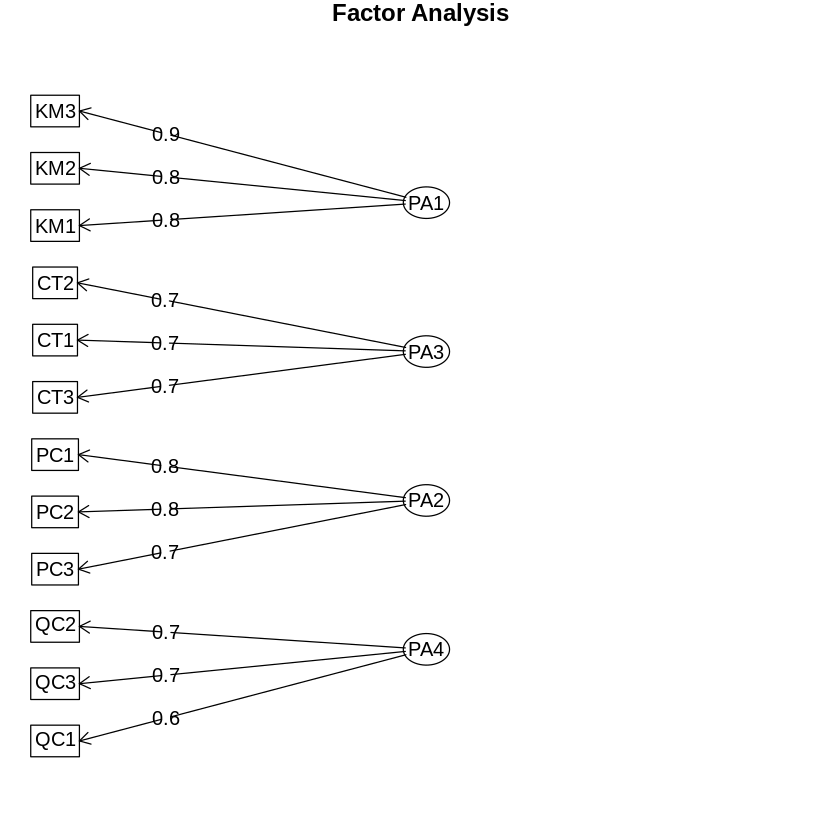

In [26]:
fa.diagram(fa.none)